
* Build and train a simple feed-forward neural network using Sequential model
* Refactor code to build same model but using the Keras functional API

## Review of a simple feed-forward neural network using _Sequential_ model

In [63]:
import numpy as np

from keras.datasets import reuters
from keras import models
from keras import layers

import matplotlib.pyplot as plt

In [49]:
# load data
# restrict to 10,000 most frequentyly occuring words in data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# train_data contains an array of lists where each list contains the word index for a given Reuters newswire

### Prepare data

In [50]:
def vectorize_sequences(sequences, dimension=10000):
    # turn the list of word indices into a 10000-dimensional
    # 0/1 vector
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # in position indicated in sequence, replace it 1
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape

(8982, 10000)

In [51]:
def to_one_hot(labels, dimension=46):
    # one-hot encode labels (there are 46 labels)
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

### Build Sequential model and compile it

In [58]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Create validation set and train model

In [59]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [60]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

### Visualize training and validation loss

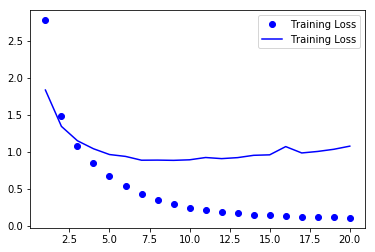

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +  1)

plt.plot(epochs, loss, 'bo', label='Training Loss');
plt.plot(epochs, val_loss, 'b', label='Training Loss');
plt.legend();